# Ensayos de Pozos

Importo las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analysis of a Constant-Rate Well Test

     t       p
0  0.0  2500.0
1  0.1  2388.3
2  0.2  2381.5
3  0.3  2377.5
4  0.4  2374.7


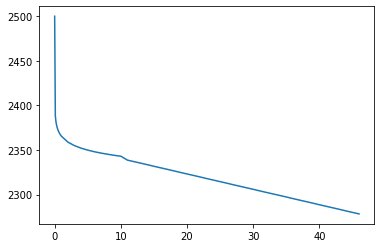

In [9]:
df = pd.read_csv('./datasets/ejemplo_1.csv')
print(df.head())
plt.plot(df.t, df.p)

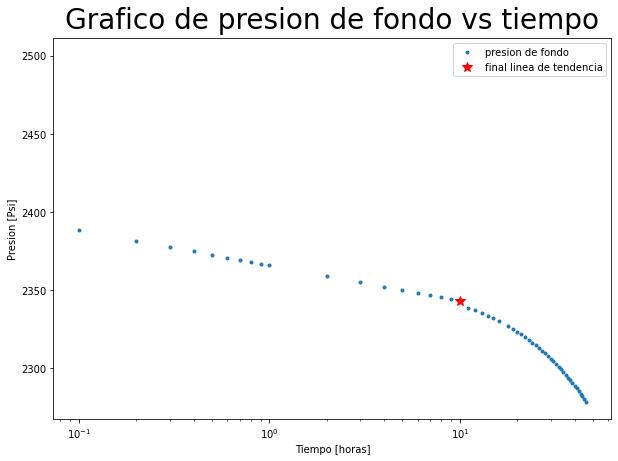

In [12]:
ejex = df.t
ejey = df.p

# tomamos com time index 19 por donde empezaremos a realizar la regresion, esto ira cambien constante mente

index = 19

# graficamos presion de fluencia vs tiempo
plt.figure(figsize = (10, 7))
p1 = plt.semilogx(ejex, ejey, '.')

# graficamos el indice asumido para tomar la regresion
p2 = plt.semilogx(df.t[index], df.p[index], '*', color = 'r', ms=10)
plt.legend((p1[0], p2[0]), ('presion de fondo', 'final linea de tendencia'))

plt.title('Grafico de presion de fondo vs tiempo', size = 28, pad = 10)
plt.xlabel('Tiempo [horas]')
plt.ylabel('Presion [Psi]')
plt.show()

Para hacer la regresion cortaremos el dataframe desde df[0] hasta df[index]. descartando asi el tiempo 0 para que el tiempo no de infinito

In [16]:
df1 = df.iloc[:index+1, :]
#dropeamos tiempo = 0
dfr = df1.drop(df.index[0])

x = np.log(np.array(dfr.t))
y = np.array(dfr.p)

def regression(x, y):
    n = np.size(x)
    
    m_x, m_y = np.mean(x), np.mean(y)
    
    SS_xy = np.sum(x*y) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0, b_1) 

c, m = regression(x, y)
print('La pediente de la recta semilog de Presion vs tiempo es:', m)
print('La intersepcion de la recta semilog de Presion vs tiempo es:', c)



La pediente de la recta semilog de Presion vs tiempo es: -9.816049286818531
La intersepcion de la recta semilog de Presion vs tiempo es: 2365.6951804701193


Grafico la regresion en el grafico semi log de P vs t

/tmp/ipykernel_1489/2381163006.py:1: RuntimeWarning: divide by zero encountered in log
  x_reg = np.log(np.array(df.t))


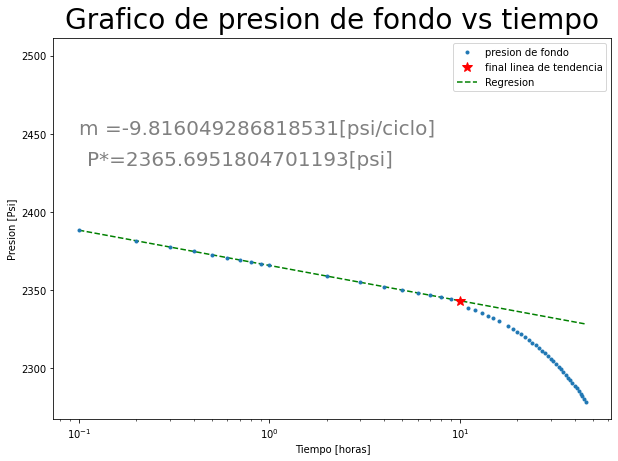

In [23]:
x_reg = np.log(np.array(df.t))
y_reg = m * x_reg + c
plt.figure(figsize = (10, 7))



p3 = plt.semilogx(df.t, y_reg, '--', color = 'g', ms = 0.5)

p1 = plt.semilogx(ejex, ejey, '.')

# graficamos el indice asumido para tomar la regresion
p2 = plt.semilogx(df.t[index], df.p[index], '*', color = 'r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('presion de fondo', 'final linea de tendencia', 'Regresion'))

plt.title('Grafico de presion de fondo vs tiempo', size = 28, pad = 10)
plt.xlabel('Tiempo [horas]')
plt.ylabel('Presion [Psi]')
plt.text(0.1, 2450, f'm ={m}[psi/ciclo]', fontsize=20, color='gray')
plt.text(0.11, 2430, f'P*={c}[psi]', fontsize=20, color='gray')
plt.show()

Determinamos la permeabilidad

In [24]:
poro = 0.15
rw = 0.333 # in ft
h = 32 # in ft
qo = 1000 # in STB/d
swi = 0.25
ct = 12E-06 # in psi^-1
pi = 2500 # initial pressure in psia
mu_oil = 2 # in cP
Bo = 1.333 # in RB/STB

m_cycle = m * np.log(10)

k = - (162.6 * qo * Bo * mu_oil) / (m_cycle * h)
print("La Permeabilidad obtenida de la Presion:", k, "milidarcies")

La Permeabilidad obtenida de la Presion: 599.3469353431107 milidarcies


Entonces definimos el tiempo de accion finita o reservorio finito at = 10

In [25]:
t_acc_fin = 10

t_Dw = (t_acc_fin * 0.0002637 * k) / (poro * mu_oil * ct * (rw**2))
r_eD_square = 4 * t_Dw
re = rw * np.sqrt(r_eD_square)

print("Wl radio del reservorio es:", re, "ft")

Wl radio del reservorio es: 1325.174147255867 ft


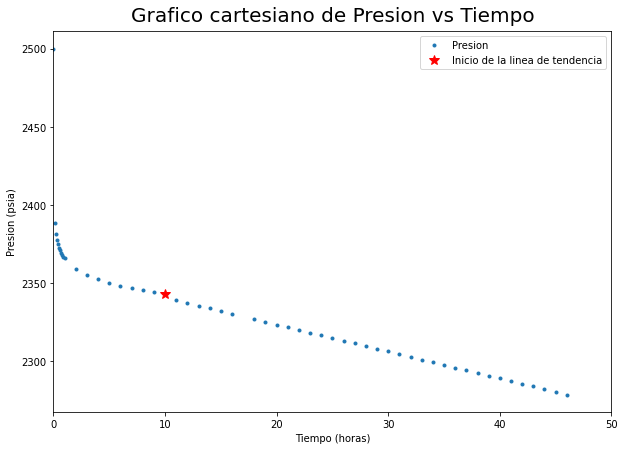

In [29]:
#Aqui abordaremos el mismo problema pero con ejes cartesianos

index2 = index # similar to the index of semilog plot

# plot borehole flowing pressure vs time
plt.figure(figsize=(10, 7))
p1 = plt.plot(ejex, ejey, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(df.t[index2], df.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0]), ('Presion', 'Inicio de la linea de tendencia'))

plt.xlim(0, 50)
plt.title('Grafico cartesiano de Presion vs Tiempo', size=20, pad=10)
plt.xlabel('Tiempo (horas)'); plt.ylabel('Presion (psia)')
plt.show()

In [28]:
# Generamos la linea de tendencia

df2 = df.iloc[index2:, :]

x2 = np.array(df2.t)
y2 = np.array(df2.p)

c2, m2 = regression(x2,y2)

print("La pendiente es:", m2)
print("La P* es:", c2, "psia")

La pendiente es: -1.7357010538030258
La P* es: 2358.0966492729244 psia


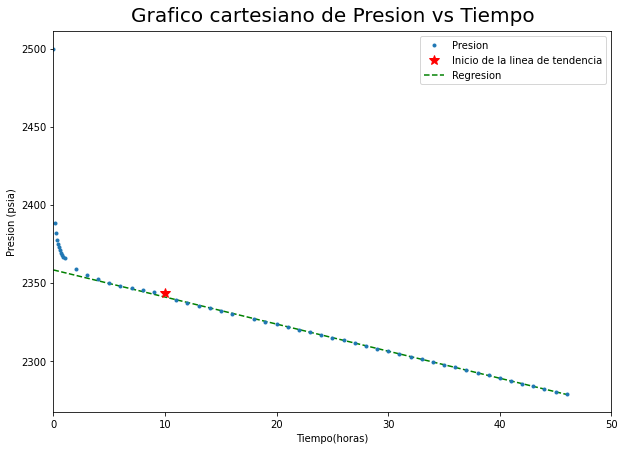

In [32]:
# Procedemos a graficar

x_reg2 = np.array(df.t)
y_reg2 = m2 * x_reg2 + c2

# plot borehole flowing pressure vs time

plt.figure(figsize=(10, 7))

p3 = plt.plot(df.t, y_reg2, '--', color='g', ms=0.5)

p1 = plt.plot(ejex, ejey, '.')

# plot the guessed 'end of straight' line for regression
p2 = plt.plot(df.t[index2], df.p[index2], '*', color='r', ms=10)
plt.legend((p1[0], p2[0], p3[0]), ('Presion', 'Inicio de la linea de tendencia', 'Regresion'))

plt.xlim(0, 50)
plt.title('Grafico cartesiano de Presion vs Tiempo', size=20, pad=10)
plt.xlabel('Tiempo(horas)'); plt.ylabel('Presion (psia)')
plt.show()

Calculamos el radio del pozo

In [33]:

re2 = np.sqrt(-((0.07447 * qo * Bo) / (poro * h * ct * m2)))
print("El radio del reseservorio es:", re2, "ft")

El radio del reseservorio es: 996.4535215820936 ft


Calculalos el Skin Factor

In [34]:

# primero determinamos el b1hr (la presion a una hora de la linea de regresion)

t1hr = 1 # tiempo a 1 hora
b1hr = m2 * t1hr + c2 
 

s = 1.1513 * (((pi - b1hr) / -m_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)
print("Presion a 1 hora:", b1hr, "psia")
print("Skin factor:", s)

Presion a 1 hora: 2356.3609482191214 psia
Skin factor: 0.4675191449502658
